# Teste T para uma **amostra**

Teste para amostras pequenas (limitação de 30 amostras), cujo desvio padrão populacional é geralmente desconhecido.

In [10]:
import pandas as pd
import numpy as np

In [11]:
enem_sp = pd.read_csv('enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

In [12]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [13]:
colegioy = enem_sp.loc[enem_sp.CO_ESCOLA == 35151506.0] 

In [14]:
colegioy.shape # tem 30 amostras

(30, 28)

In [15]:
colegioy.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
492,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35151506.0,...,64.0,Inglês,1.0,160.0,160.0,140.0,140.0,120.0,720.0,Sim
7910,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35151506.0,...,699.5,Inglês,1.0,160.0,120.0,160.0,160.0,140.0,740.0,Sim
14367,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,780.2,Inglês,1.0,120.0,120.0,100.0,140.0,160.0,640.0,Sim
22519,"1,90E+11",São Paulo,17,F,1,preta,1,2,privada,35151506.0,...,732.2,Inglês,1.0,140.0,120.0,140.0,180.0,120.0,700.0,Sim
58184,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,756.3,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


1) Analisar a classificação das variáveis

In [16]:
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [17]:
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [18]:
import plotly.express as px

In [19]:
grafico = px.box(colegioy, y="NOTA_REDACAO")
grafico.show()

4) Analisar Normalidade

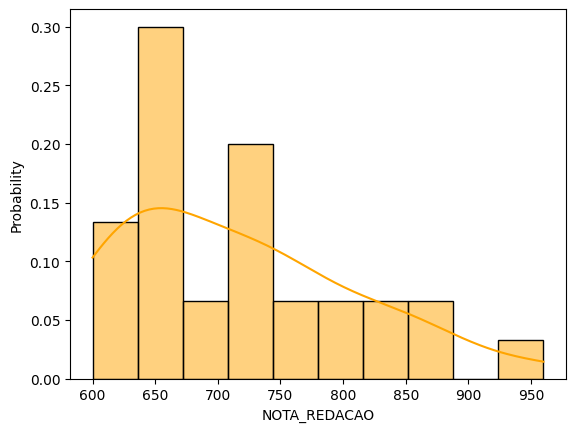

In [20]:
import seaborn as sns
sns.histplot(colegioy, x='NOTA_REDACAO', bins=10, color="orange", kde=True, stat="probability");

In [21]:
import scipy.stats as stats
import matplotlib.pyplot as plt

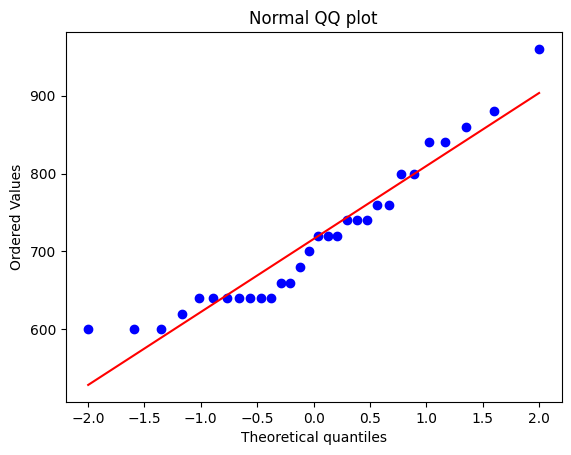

In [22]:
stats.probplot(colegioy['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

## critérios:
- nível de significância de 0,05 ou 5% (mais utilizado);
- quando p > 0,05 é uma distribuição normal.

In [33]:
# teste Shapiro-Wilk ( resultado cal estatística de teste, p valor)
stats.shapiro(colegioy.NOTA_REDACAO) # não é uma dist normal

ShapiroResult(statistic=0.9185918569564819, pvalue=0.024661008268594742)

In [24]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [25]:
# teste Lilliefors (Kolmogorov_Sminorv) (estatística teste, p valor) # teste conservador  
statsmodels.stats.diagnostic.lilliefors(colegioy.NOTA_REDACAO, dist = 'norm') # é dist normal

(0.15794211976028916, 0.052842042822119004)

In [26]:
# teste Anderson-Darling
stats.anderson(colegioy.NOTA_REDACAO, 'norm') # é uma dist normal

AndersonResult(statistic=0.8227980663381267, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=716.0, scale=93.86711076174988)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

**INTERPRETAÇÃO:**

- teste estatístico: t = 7,18

- p_valor = 6.72e-08

- **Conclusão**: Estatisticamente, a média de redação do colégio y é diferente da média do Estado de São Paulo, com intervalo de confiança de 95% (nível de significância é 5%).



In [31]:
enem_sp.NOTA_REDACAO.describe().round(2)

count    499940.00
mean        593.02
std         170.54
min           0.00
25%         500.00
50%         600.00
75%         680.00
max        1000.00
Name: NOTA_REDACAO, dtype: float64

In [32]:
colegioy.NOTA_REDACAO.describe().round(2)

count     30.00
mean     716.00
std       93.87
min      600.00
25%      640.00
50%      710.00
75%      760.00
max      960.00
Name: NOTA_REDACAO, dtype: float64